In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from importlib import reload
import scipy.interpolate as scint
import ternary

from datetime import datetime

import better_mob as bm
import pandas as pd

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from importlib import reload
reload(bm)

<module 'better_mob' from '/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py'>

In [3]:
plt.rc('font', family='STIXGeneral')
r=(216,27,96)
r='#D81B60'
r='#ff6600' #changed to the new orange
r='#be0f34'
b=(30,136,229)
b='#1E88E5'
b='#1E88E5'
ob='#002147'
g=(0,77,64)
g='#004D40'
g='#007770'
y=(255,193,7)
y='#FFC107'
y='#f5cf47'

# top = np.array([np.array([255,193,7, 256])/256]*128)
# top = np.array([np.array([150,150,150,256])/256]*128)
# bottom = np.array([np.array([256,256,256,0])/256]*128)
# newcolors = np.vstack((top, bottom))
# newcolors = np.vstack((bottom, top))
# newcmp = ListedColormap(newcolors)
# plt.matshow(np.random.rand(25, 25), cmap=newcmp)

In [4]:
enz_star=0.15
del_mu=8.0
del_e=-5.0
k_spo=1.0
k_cat=1
Dpe=4.0
Dse=1.0
v_rat=20.0

phie0=0.15

#Additional Parameters for ternary
Dps=10
v_s = 1
v_w = v_s
Dew=10
Dsw=10
Dpw=10

In [11]:
k_cat_tanfile = './20210907180535_tangent.csv'
df = pd.read_csv(k_cat_tanfile)
df['phi1mid'] = ((df['phiE1hi']+df['phiE1low'])/2)
df['phi2mid'] = (df['phiE2hi']+df['phiE2low'])/2
df = df[df['phiE1hi'] != 1]

vol1 = df[['k_cat','phi1mid']].copy().rename(columns={'k_cat': 'k_cat', 'phi1mid': 'binod'})
vol2 = df[['k_cat','phi2mid']].copy().rename(columns={'k_cat': 'k_cat', 'phi2mid': 'binod'})
k_cat_ordered = pd.concat([vol1, vol2]).sort_values('binod')

cks = scint.CubicSpline(k_cat_ordered['binod'], k_cat_ordered['k_cat'])

del_mu_tanfile = './20211122183752_tangent.csv'
df = pd.read_csv(del_mu_tanfile)
df['phi1mid'] = ((df['phiE1hi']+df['phiE1low'])/2)
df['phi2mid'] = (df['phiE2hi']+df['phiE2low'])/2
df = df[df['phiE1hi'] != 1]

vol1 = df[['del_mu','phi1mid']].copy().rename(columns={'del_mu': 'del_mu', 'phi1mid': 'binod'})
vol2 = df[['del_mu','phi2mid']].copy().rename(columns={'del_mu': 'del_mu', 'phi2mid': 'binod'})
del_mu_ordered = pd.concat([vol1, vol2]).sort_values('binod')

cmus = scint.CubicSpline(del_mu_ordered['binod'], del_mu_ordered['del_mu'])

k_cats, enzs_k = np.meshgrid(np.arange(0.1, 1.9, .02), np.arange(0.0001, 0.4, 0.01))
del_mus, enzs_mu = np.meshgrid(np.arange(2, 10, .05), np.arange(0.0001, 0.4, 0.01))
enzx = np.arange(np.min(k_cat_ordered['binod']), np.max(k_cat_ordered['binod']), 0.001)

In [12]:
sys = [enz_star, del_mu, del_e, k_spo, k_cat, Dpe, Dse, v_rat]
sys_label = ['enz_star', 'del_mu', 'del_e', 'k_spo', 'k_cat', 'Dpe', 'Dse', 'v_rat']
title = ''
for lab, val in zip(sys_label, sys):
    if np.size(val) == 1:
        title += '{}: '.format(bm.labels[lab])
        title += '{0:.3g}, '.format(val)
title = title[:-2]

In [5]:
efile, sfile, pfile = './new5000e.txt', './new5000s.txt', './new5000p.txt',;
edata = np.genfromtxt(efile, delimiter=',')[1:, :]
sdata = np.genfromtxt(sfile, delimiter=',')[1:, :]
pdata = np.genfromtxt(pfile, delimiter=',')[1:, :]

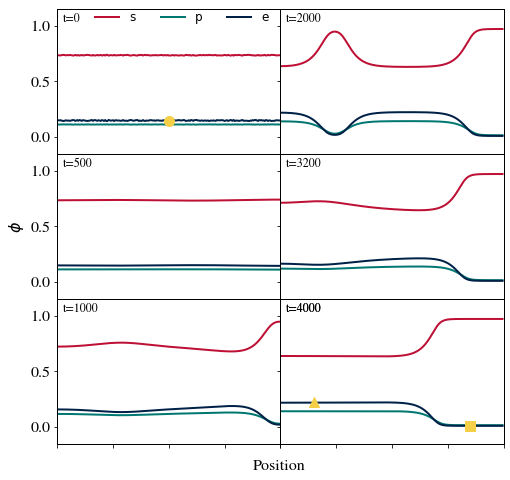

In [88]:
marksize = 100

frames = [0, 500, 1000, 2000, 3200, 4000]

fig, axs = plt.subplots(3, 2, figsize=(8,8), sharex=True,sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

#Plot Evolution of system
for ax, frame in zip(axs.transpose().flatten(), frames):
#     ax.plot(sdata[frame, :], r, label='$\mathrm{s}$')
#     ax.plot(pdata[frame, :], g, label='$\mathrm{p}$')
#     ax.plot(edata[frame, :], ob, label='$\mathrm{e}$')
#     ax.set_ylabel('$\phi$');
#     ax.set_xlabel('Position');
#     ax.set_ylim(-0.1, 1.2)
#     ax.set_xlim(0, 200)
#     ax.text(0.82, 0.97, 't={}'.format(frame), transform=ax.transAxes, va='top', ha='left', size=12)
#     ax.set_yticks([0, 0.5, 1]),sharex=True
#     ax.legend(ncol=3, loc='upper left', frameon=False)
# ###
# for ax, frame in zip([f1_ax3, f1_ax4, f1_ax5], frames):
    ax.plot(sdata[frame, :], r, label='$\mathrm{s}$', lw=2)
    ax.plot(pdata[frame, :], g, label='$\mathrm{p}$', lw=2)
    ax.plot(edata[frame, :], ob, label='$\mathrm{e}$', lw=2)
    ax.set_ylim(-0.15, 1.15)
    ax.set_xlim(0, 200)
    ax.text(0.025, 0.97, 't={}'.format(frame), transform=ax.transAxes, va='top', ha='left', fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(axis='y', labelsize=16)
    [x.set_linewidth(1) for x in ax.spines.values()]
#     ,fontsize=16, fontweight='bold', va='top', ha='right')
axs[0, 0].legend(ncol=3, loc=(0.15, 0.85), frameon=False, fontsize=12)
axs[1, 0].set_ylabel('$\phi$', fontsize=16);
axs[1, 0].set_xlabel('Position', fontsize=16)
ax.text(0.025, 0.97, 't={}'.format(frame), transform=ax.transAxes, va='top', ha='left', fontsize=12)
###
# ax.set_xticks([])
#     ax.set_yticks([0, 1])

axs[0, 0].set_yticks([0, 0.5, 1])
axs[0, 0].tick_params(axis='y', labelsize=16)
axs[1, 0].set_yticks([0, 0.5, 1])
axs[1, 0].tick_params(axis='y', labelsize=16)
axs[2, 0].set_yticks([0, 0.5, 1])
axs[2, 0].tick_params(axis='y', labelsize=16)

axs[2, 0].set_xticks([0, 50, 100, 150, 200])
axs[2, 0].xaxis.set_ticklabels([])
axs[2, 0].tick_params(axis='y', labelsize=16)
axs[2, 1].set_xticks([0, 50, 100, 150, 200])
axs[2, 1].xaxis.set_ticklabels([])
axs[2, 1].tick_params(axis='y', labelsize=16)

axs[0, 0].scatter(100, enz_star, marker='o', s=marksize, alpha=1, c=y, zorder=10)
axs[2, 1].scatter(30, hi_end, marker='^', s=marksize, alpha=1, c=y, zorder=10)
axs[2, 1].scatter(170, low_end, marker='s', s=marksize, alpha=1, c=y, zorder=10)

fig.text(0.465, 0.08, 'Position', fontsize=16)


fig1.tight_layout()

In [89]:
fig.savefig('../../figures/CIPSnumeric.pdf')